# **HOUSE PRICE PREDICTION**

# Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

# Load Dataset

In [39]:
#importing california housing dataset from sklearn and creating and dataframe

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Price"] = data.target

# Basic Data Exploration

In [40]:
#first 10 rows of dataset

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [41]:
#understanding all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [42]:
#statistical summary of columns

df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Data Cleaning

In [ ]:
#checking for null values

df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [10]:
#checking for duplicate entries

df.duplicated().sum()

np.int64(0)

Data already clean; no null values or duplicates found in any column

# Feature Engineering

In [43]:
#creating new meaningful features from exiting features

df['Rooms_per_Household'] = df['AveRooms'] / df['HouseAge']
df['Bedrooms_per_Room'] = df['AveBedrms'] / df['AveRooms']
df['Population_per_Household'] = df['Population'] / df['AveOccup']

df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price', 'Rooms_per_Household',
       'Bedrooms_per_Room', 'Population_per_Household'],
      dtype='object')

# Data Visualization

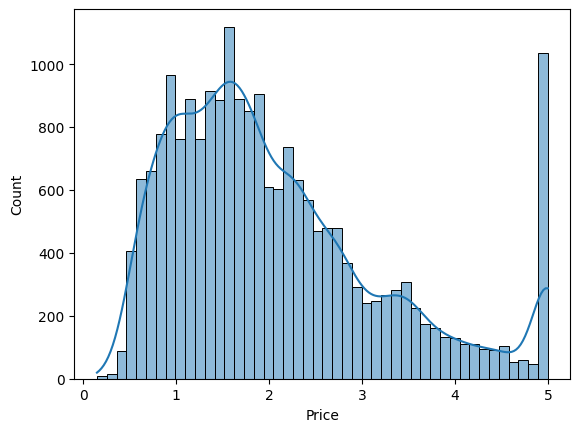

In [44]:
#visualizing distribution of price over the dataset

sns.histplot(df["Price"],kde=True)
plt.show()

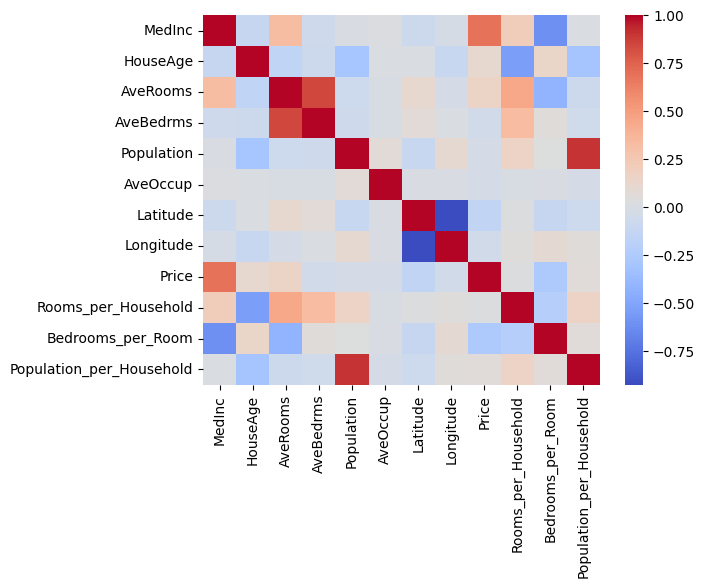

In [16]:
#correlation between features
#(identify which factors affect price with how much significance)

sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

# Feature Selection

In [45]:
#setting input variables and price as target variable

X = df.drop("Price", axis=1)
y = df["Price"]

# Splitting the dataset

In [46]:
#splitting dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [47]:
#scaling input variables to average

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying Linear Regression Model

In [48]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

# Prediction and Evaluation

In [22]:
y_pred = lr_model.predict(X_test)

In [23]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.5030178885485008
MSE: 0.4842352332284618
RMSE: 0.6958701266963986
R2 Score: 0.6304701499538703


# Residual Analysis

In [51]:
residuals = y_test - y_pred
residuals

,Price
20046,-0.081140
3024,-1.322155
15663,1.647508
20484,-0.499982
9814,0.165817
...,...
15362,0.592493
16623,0.275062
18086,0.508095
2144,-0.540508


* If residual = 0 → perfect prediction
* Positive residual → model under-predicted
* Negative residual → model over-predicted




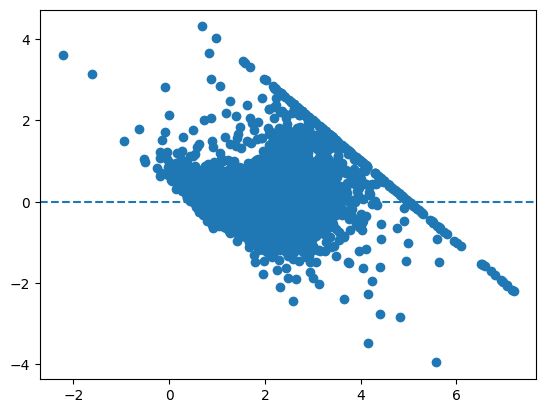

In [52]:
#Checks linearity and equal variance(homoscedasticity)

plt.scatter(y_pred, residuals)
plt.axhline(y=0, linestyle="--")
plt.show()

Model is reliable as the points are randomly scattered,centered around zero and constantly spread(no funnel shaped)

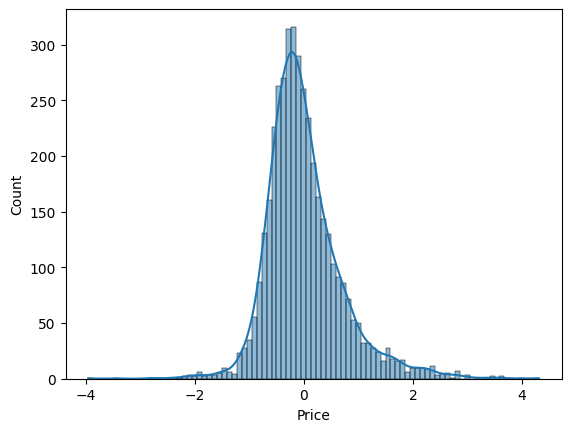

In [37]:
sns.histplot(residuals, kde=True)
plt.show()

Checks normality of errors

Our's is good

(✔ Bell-shaped curve → good
❌ Skewed → model issue)

# Ridge & Lasso

In [54]:
#reduces overfitting

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))

Ridge R2: 0.6304653568173932


In [55]:
# performs feature selection

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R2:", r2_score(y_test, lasso_pred))

Lasso R2: 0.6256698134653896


# Model Interpretation

In [56]:
#shows model coefficients(how each feature effects price)

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_
})
coeff_df

,Feature,Coefficient
0,MedInc,0.803640
1,HouseAge,0.147378
2,AveRooms,0.150866
3,AveBedrms,-0.050769
4,Population,-0.470710
5,AveOccup,0.006969
6,Latitude,-0.875750
7,Longitude,-0.830300
8,Rooms_per_Household,-0.002060
9,Bedrooms_per_Room,0.206201


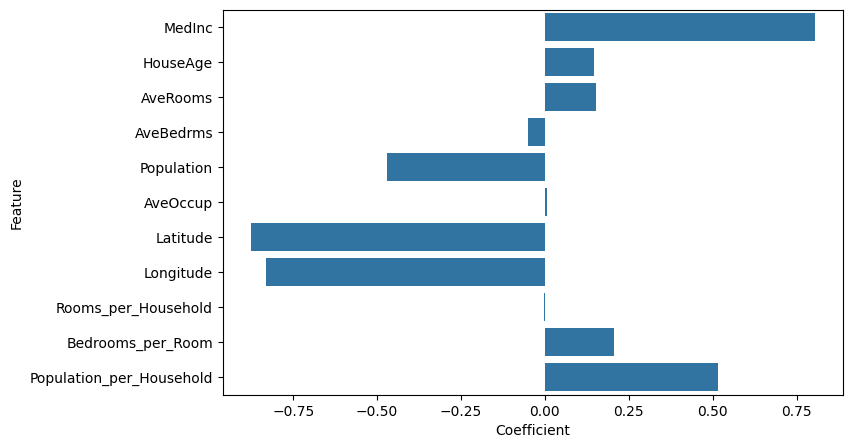

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x="Coefficient", y="Feature", data=coeff_df)
plt.show()

# Save model

In [59]:
joblib.dump(lr_model, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Sample Prediction

In [61]:
#providing sample input(you can also do without specifying columns but in order)

sample_input = pd.DataFrame([{
    "MedInc": 8.3252,
    "HouseAge": 41.0,
    "AveRooms": 6.9841,
    "AveBedrms": 1.0238,
    "Population": 322.0,
    "AveOccup": 2.5556,
    "Latitude": 37.88,
    "Longitude": -122.23,
    "Rooms_per_Household": 0.1704,
    "Bedrooms_per_Room": 0.1466,
    "Population_per_Household": 126.0
}])


In [62]:
sample_scaled = scaler.transform(sample_input)
prediction = lr_model.predict(sample_scaled)

print("Predicted House Price:", prediction[0])

Predicted House Price: 4.092827511446782
